## About Dataset
What is Customer Segmentation?

Customer segmentation is the practice of categorizing customers into distinct groups based on shared characteristics, enabling companies to target and tailor their marketing strategies to each group effectively. Customers are typically segmented based on their similarities in behavior, preferences, and purchasing habits.
https://www.kaggle.com/datasets/alifarahmandfar/customer-segmentation

### Attribute	Information
1. **CUST_ID Credit** - card holder ID

2. **BALANCE Monthly** - average balance (based on daily balance averages)

3. **BALANCE_FREQUENCY** -	Ratio of last 12 months with balance. (1: Frequently updated, 0: Not frequently updated)

4. **PURCHASES** - Total purchase amount spent during last 12 months

5. **ONEOFF_PURCHASES** - Total amount of one-off purchases

6. **INSTALLMENTS_PURCHASES** - Total amount of installment purchases

7. **CASH_ADVANCE** - Total cash-advance amount

8. **PURCHASES_FREQUENCY** - Frequency of purchases (Percent of months with at least one purchase). (1: Frequently purchased, 0: Not frequently purchased)

9. **ONEOFF_PURCHASES_FREQUENCY** - Frequency of one-off-purchases. (1: Frequently purchased, 0: Not frequently purchased)

10.	**PURCHASES_INSTALLMENTS_FREQUENCY** - Frequency of installment purchases. (1: Frequently purchased, 0: Not frequently purchased)

11.	**CASHADVANCE_FREQUENCY** - Cash-Advance frequency

12.	**CASH_ADVANCE_TRX** - Average amount per cash-advance transaction

13.	**PURCHASES_TRX** - Average amount per purchase transaction

14.	**CREDIT_LIMIT** - Credit limit

15.	**PAYMENTS** - Total payments (Due amount paid by the customer to decrease their statement balance) in the period

16.	**MINIMUM_PAYMENTS** - Total minimum payments due in the period

17.	**PRC_FULL_PAYMEN** - Percentage of months with full payment of the due statement balance

18.	**TENURE** - Number of months as a customer

In [1]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("alifarahmandfar/customer-segmentation")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\default.ASUS\.cache\kagglehub\datasets\alifarahmandfar\customer-segmentation\versions\1


In [3]:
import os

In [4]:
df = pd.read_csv(os.path.join(path, "Customer_Data.csv"))

In [5]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [7]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


In [9]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [10]:
#drop the null values
customer_df = df.dropna()

In [11]:
# drop the customer id as it is not required
customer_df = customer_df.drop('CUST_ID', axis=1)

In [12]:
customer_df.shape

(8636, 17)

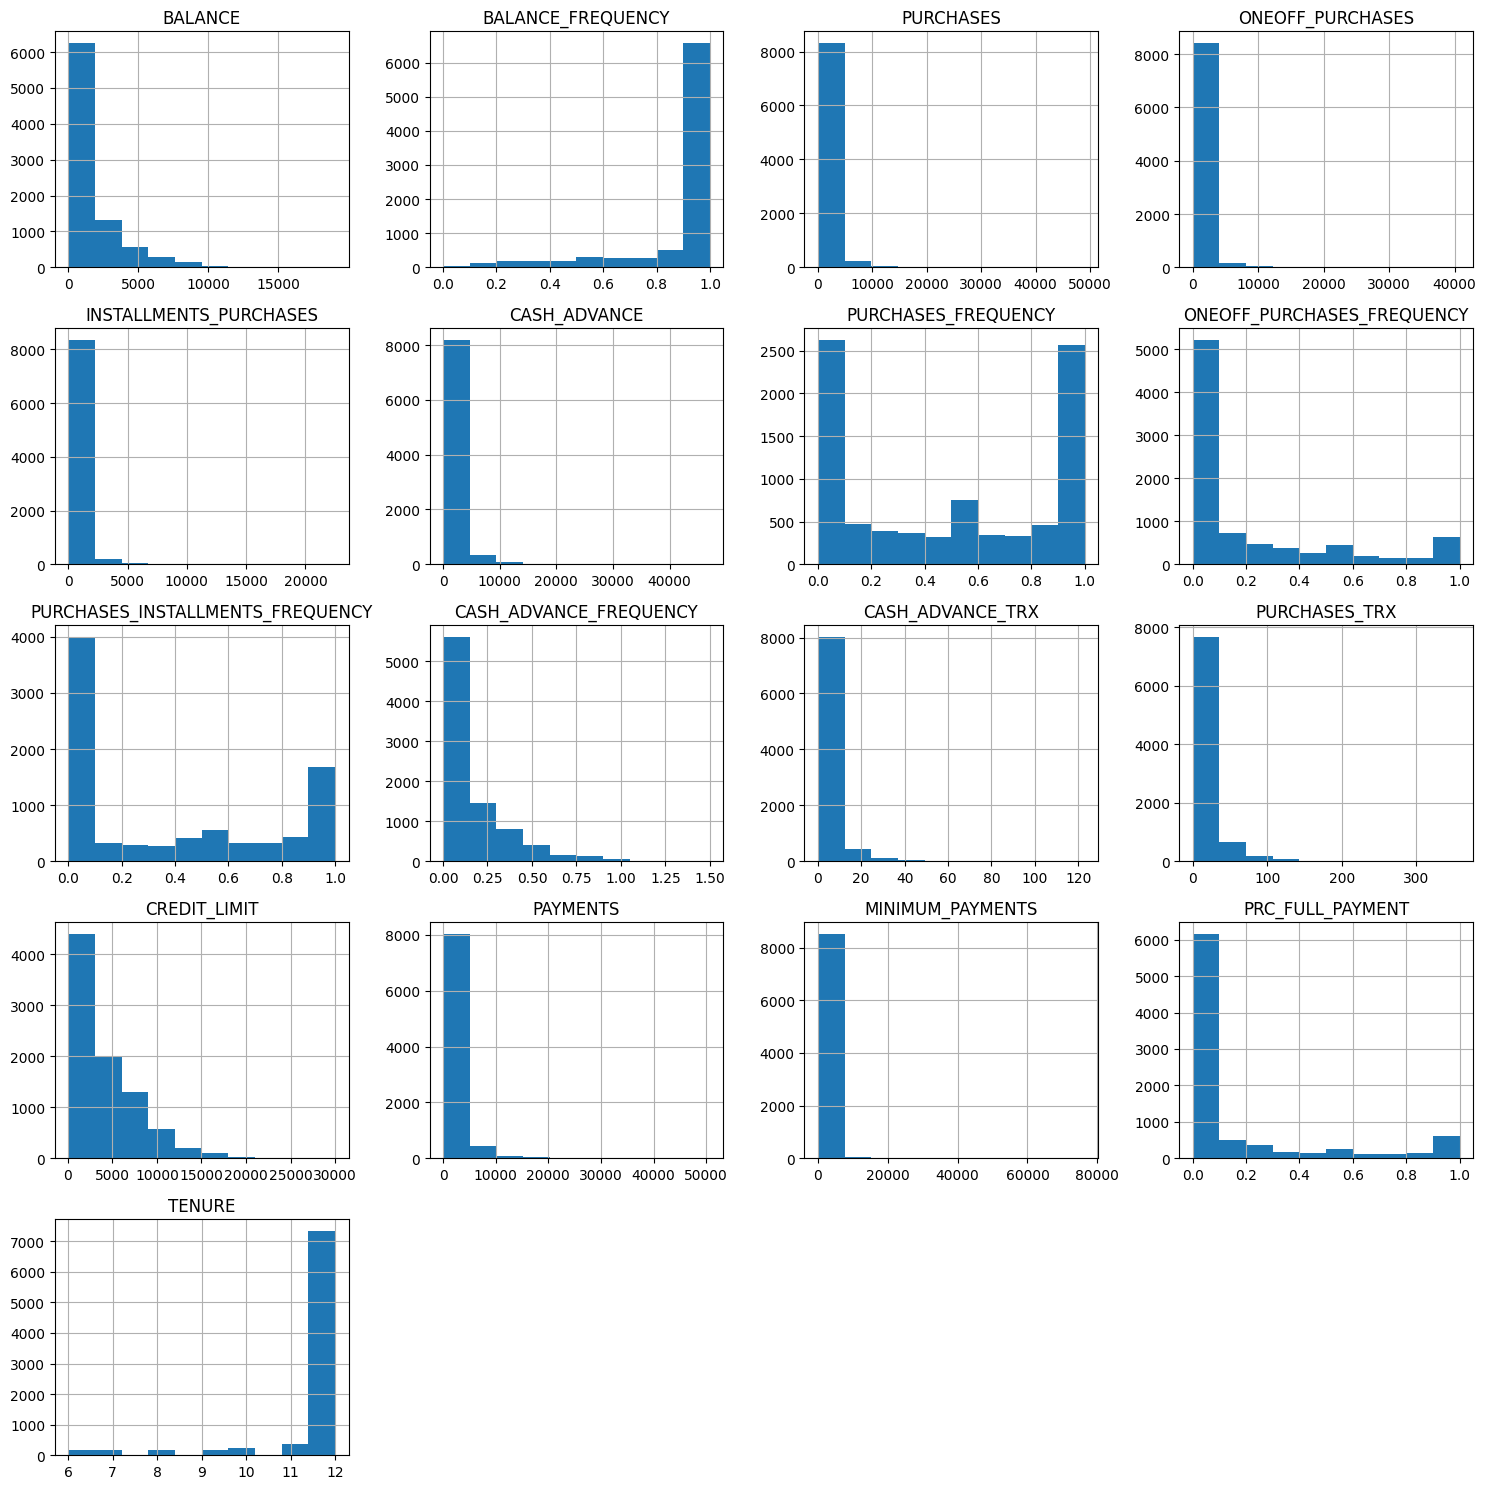

In [13]:
customer_df.hist(figsize=(15, 15))
plt.tight_layout()
plt.show()

### Data Preprocessing

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
customer_scaled = scaler.fit_transform(customer_df)

In [15]:
customer_scaled

array([[-0.74462486, -0.37004679, -0.42918384, ..., -0.30550763,
        -0.53772694,  0.35518066],
       [ 0.76415211,  0.06767893, -0.47320819, ...,  0.08768873,
         0.21238001,  0.35518066],
       [ 0.42660239,  0.50540465, -0.11641251, ..., -0.09990611,
        -0.53772694,  0.35518066],
       ...,
       [-0.75297728, -0.29709491, -0.40657175, ..., -0.32957217,
         0.30614422, -4.22180042],
       [-0.75772142, -0.29709491, -0.47320819, ..., -0.34081076,
         0.30614422, -4.22180042],
       [-0.58627829, -1.09958965,  0.03129519, ..., -0.32709767,
        -0.53772694, -4.22180042]])

### Feature Selection / Dimensionality Reduction

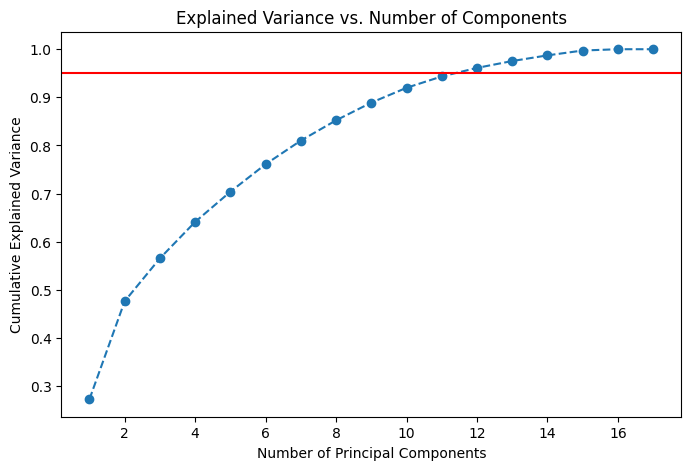

In [16]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(customer_scaled)

# Calculate cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance vs. Number of Components")
plt.axhline(y=0.95, color='r', linestyle='-')  # 95% threshold
plt.show()

In [17]:
pca = PCA(n_components=0.95)
customer_pca = pca.fit_transform(customer_scaled)

### K means Clustering

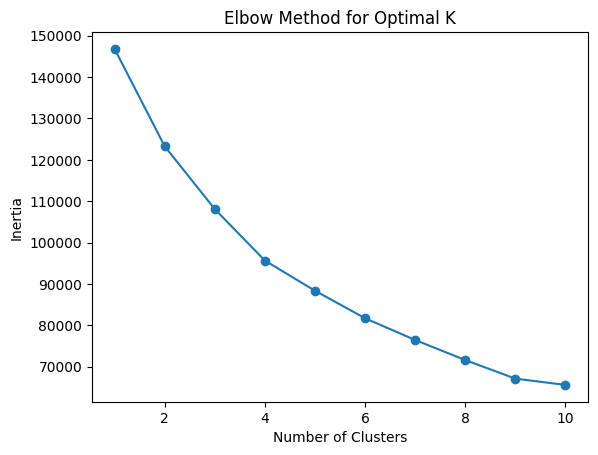

In [18]:
# Find optimal number of clusters using the Elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(customer_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
import matplotlib.pyplot as plt
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.show()

In [44]:
# Fit the best K-Means model
kmeans = KMeans(n_clusters=5, random_state=42)  # Choose K based on elbow plot
customer_df["Cluster"] = kmeans.fit_predict(customer_scaled)

print(customer_df["Cluster"].value_counts())

Cluster
3    3732
1    2916
0    1136
4     822
2      30
Name: count, dtype: int64


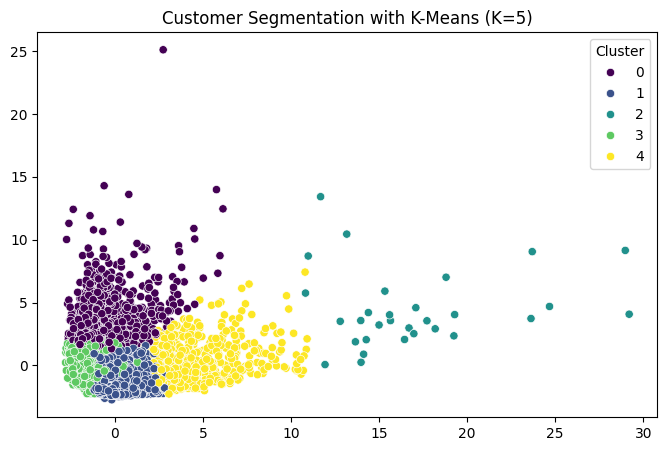

In [45]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=customer_pca[:, 0], y=customer_pca[:, 1], hue=customer_df["Cluster"], palette="viridis")
plt.title(f"Customer Segmentation with K-Means (K={5})")
plt.show()


In [46]:
customer_df.groupby("Cluster").mean()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
Cluster,,,,,,,,,,,,,,,,,
0,4641.965560,0.968678,490.660836,307.530810,183.219525,4632.975715,0.285747,0.135138,0.182657,0.488669,14.597711,7.301937,7616.861396,3596.074607,2025.114846,0.035595,11.386444
1,753.631341,0.933863,957.694081,364.386770,593.716529,182.538141,0.867793,0.221083,0.718551,0.039853,0.731824,18.488340,3688.895834,1089.398652,623.271953,0.271994,11.537380
2,5567.142164,0.957273,24957.905000,18186.875667,6771.029333,1858.844605,0.910556,0.773889,0.754444,0.083333,3.666667,148.000000,15570.000000,25178.882690,3475.059479,0.478409,11.933333
3,1094.880269,0.822150,283.706833,228.351511,55.567454,624.369203,0.166107,0.094596,0.069251,0.122253,2.271436,3.028135,3309.071097,1038.538294,588.422324,0.078629,11.489818
4,2559.864817,0.984159,4498.892019,2936.992567,1562.629380,492.027960,0.950286,0.734531,0.731461,0.070880,1.599757,63.113139,8304.927007,4279.482055,1272.386997,0.285133,11.916058
